# Changing Demographics and Black Candidates

In [1]:
import pandas as pd
import numpy as np

pop_df = pd.read_csv("RacebyYearBoston.csv")

In [2]:
pop_df

,Race,Year2019,Year2018,Year2017,Year2016,Year2015,Year2014,Year2013,Year2012,Year2011,Year2010
0,total,694295,695926,683015,672840,669469,656051,644710,637516,624969,621383
1,white,369561,365340,360756,358210,352667,347662,341007,340877,333558,336981
2,black,173098,170804,176868,173312,169390,160952,155619,166148,161596,154711
3,american_indian,1814,2306,2133,2296,1282,2337,3161,2300,1594,1516
4,asian,67451,66261,66207,65982,63603,64034,57743,58186,56844,56760
5,pacific_islander,616,165,40,252,153,59,0,0,60,133
6,other,37734,50708,49104,34687,52068,49490,58095,38788,45563,41967
7,two_or_more,44021,40342,27907,38101,30306,31517,29085,31217,25754,29315


In [3]:
pop_df_transposed = pop_df.T

In [4]:
pop_df_transposed = pop_df_transposed.reset_index()
new_header = pop_df_transposed.iloc[0]
pop_df_transposed = pop_df_transposed[1:] 
pop_df_transposed.columns = new_header
pop_df_transposed = pop_df_transposed.rename(columns={"Race":"year"})

In [5]:
pop_df_transposed['year'] = pop_df_transposed['year'].str[-4:]
pop_df_transposed = pop_df_transposed.apply(pd.to_numeric)
pop_df_transposed

,year,total,white,black,american_indian,asian,pacific_islander,other,two_or_more
1,2019,694295,369561,173098,1814,67451,616,37734,44021
2,2018,695926,365340,170804,2306,66261,165,50708,40342
3,2017,683015,360756,176868,2133,66207,40,49104,27907
4,2016,672840,358210,173312,2296,65982,252,34687,38101
5,2015,669469,352667,169390,1282,63603,153,52068,30306
6,2014,656051,347662,160952,2337,64034,59,49490,31517
7,2013,644710,341007,155619,3161,57743,0,58095,29085
8,2012,637516,340877,166148,2300,58186,0,38788,31217
9,2011,624969,333558,161596,1594,56844,60,45563,25754
10,2010,621383,336981,154711,1516,56760,133,41967,29315


Text(0.5, 1.0, 'Black Population in Boston (2010-2019)')

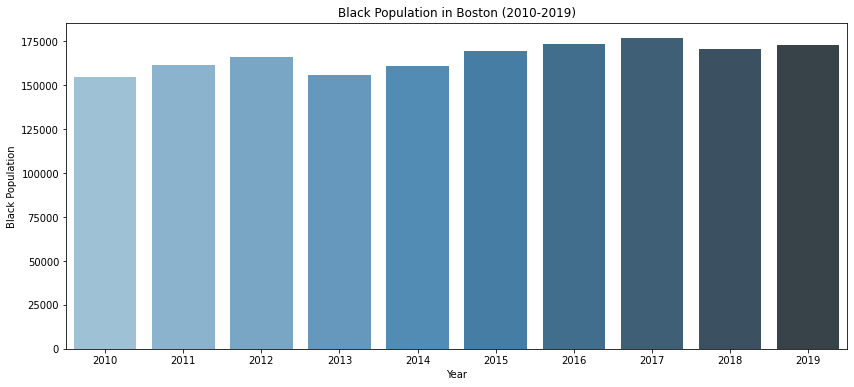

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.barplot(x="year", y="black", data=pop_df_transposed, palette="Blues_d")
plt.xlabel("Year")
plt.ylabel("Black Population")
plt.title("Black Population in Boston (2010-2019)")

Text(0.5, 1.0, 'Asian Population in Boston (2010-2019)')

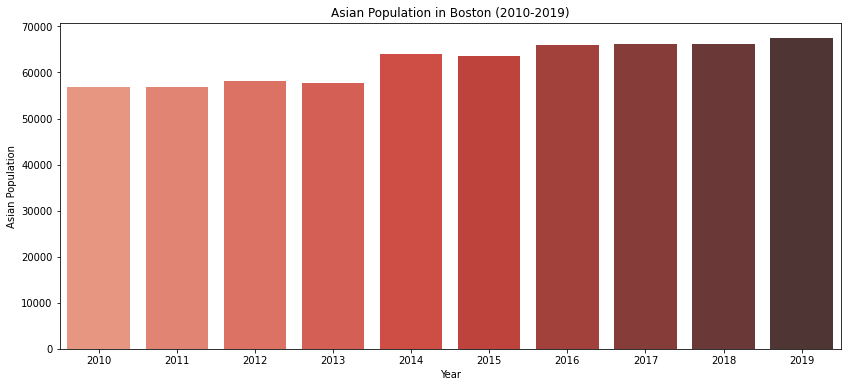

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.barplot(x="year", y="asian", data=pop_df_transposed, palette="Reds_d")
plt.xlabel("Year")
plt.ylabel("Asian Population")
plt.title("Asian Population in Boston (2010-2019)")

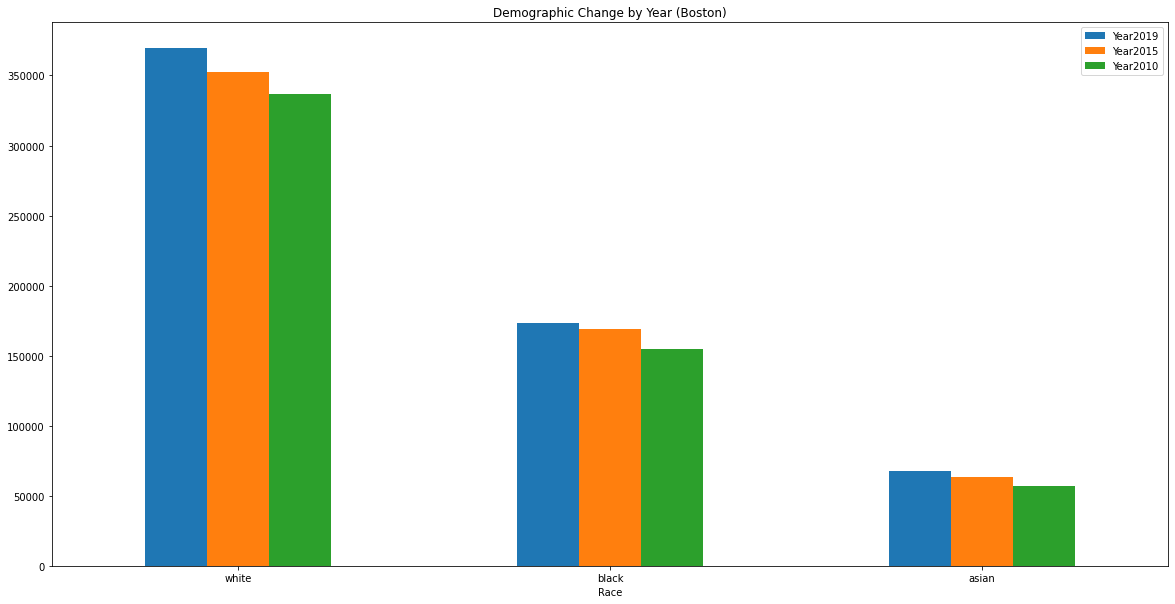

In [8]:
ax = pop_df[["Race", "Year2019", "Year2015", "Year2010"]].iloc[[1, 2, 4]].plot.bar(x='Race', rot=0, figsize = (20,10), title = "Demographic Change by Year (Boston)")

<AxesSubplot:title={'center':'Change in Black Population by Year'}, xlabel='year'>

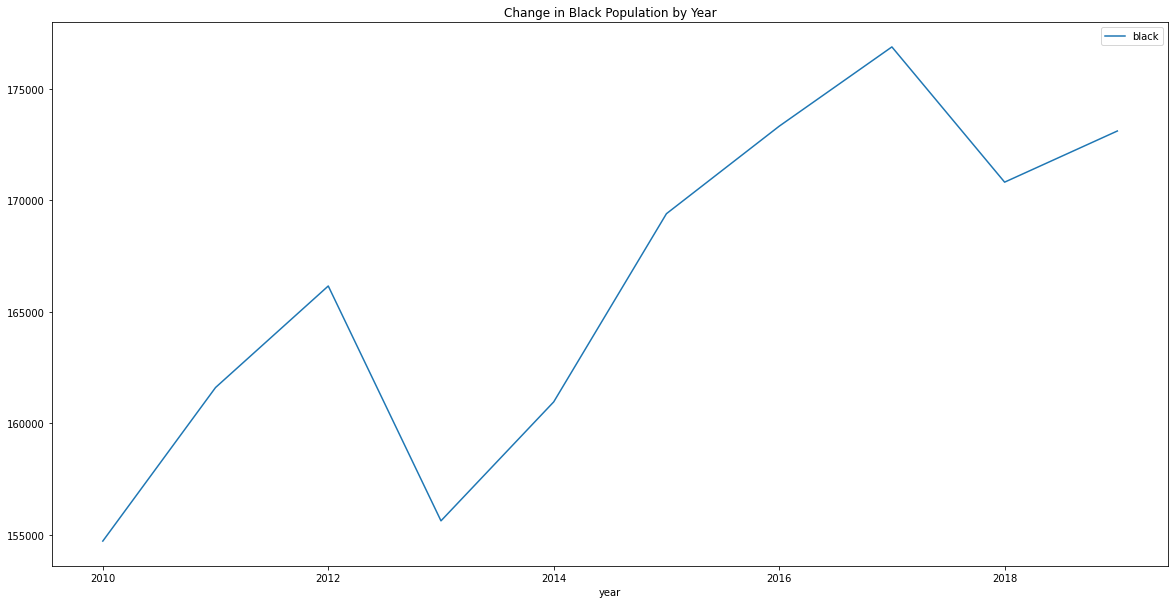

In [9]:
pop_df_transposed.plot.line(x='year', y ='black', figsize = (20,10), title = "Change in Black Population by Year")

In [10]:
pop_df_transposed= pop_df_transposed.apply(pd.to_numeric)

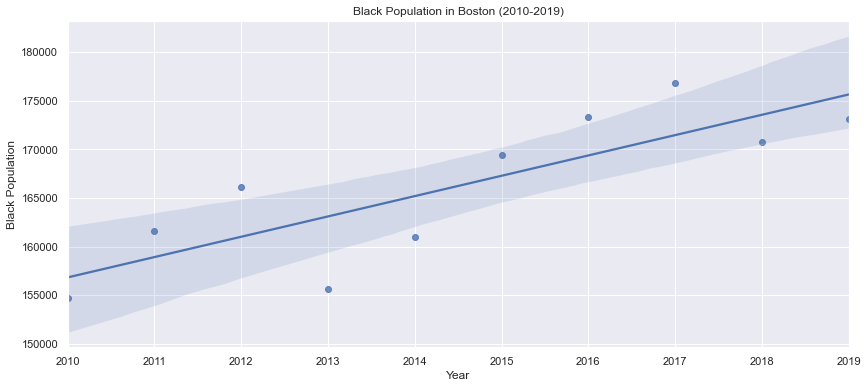

In [11]:
import seaborn as sns; sns.set_theme(color_codes=True)
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.regplot(data=pop_df_transposed, x="year", y="black")
plt.xlabel("Year")
plt.ylabel("Black Population")
plt.title("Black Population in Boston (2010-2019)")
plt.show()

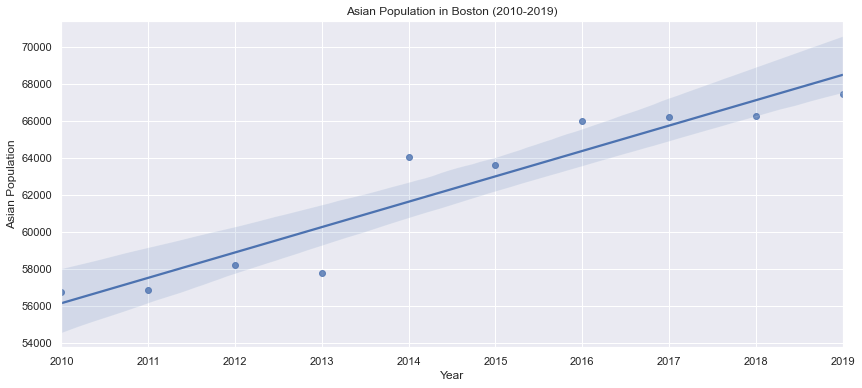

In [12]:
import seaborn as sns; sns.set_theme(color_codes=True)
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.regplot(data=pop_df_transposed, x="year", y="asian")
plt.xlabel("Year")
plt.ylabel("Asian Population")
plt.title("Asian Population in Boston (2010-2019)")
plt.show()

## A closer look at key races with Black Candidates

In [11]:
import pandas as pd

d = {'Year': [2011, 2013, 2015, 2017, 2017, 2018, 2019], 'Type': ["City Council", "City Council", "City Council", "City Council", "Mayoral", "US House Democratic Primary", "DA"], 'Candidate': ['Pressley', 'Pressley', 'Pressley', 'Pressley', 'Jackson', 'Pressley', 'Rollins'], 'Percentage': [round(37532/63009*100,2), round((60702/141782)*100, 2), round((31747/50786)*100, 2), round((57435/108879)*100, 2), 33.97, round((40615/66456)*100, 2), 72.60]}
df = pd.DataFrame(data=d)
df

,Year,Type,Candidate,Percentage
0,2011,City Council,Pressley,59.57
1,2013,City Council,Pressley,42.81
2,2015,City Council,Pressley,62.51
3,2017,City Council,Pressley,52.75
4,2017,Mayoral,Jackson,33.97
5,2018,US House Democratic Primary,Pressley,61.12
6,2019,DA,Rollins,72.60


Text(0.5, 1.0, 'Outcomes of Key Elections with Black Candidates')

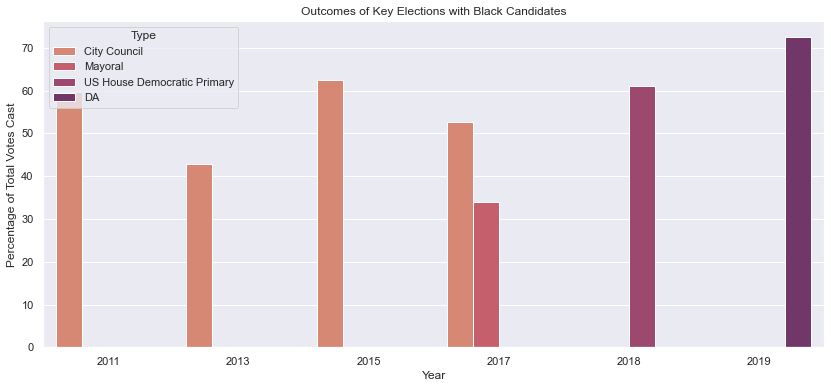

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.barplot(x="Year", y="Percentage", data=df, hue = "Type", palette = "flare")
plt.xlabel("Year")
plt.ylabel("Percentage of Total Votes Cast")
plt.title("Outcomes of Key Elections with Black Candidates")

Text(0.5, 1.0, 'Outcomes of Key Elections with Black Candidates')

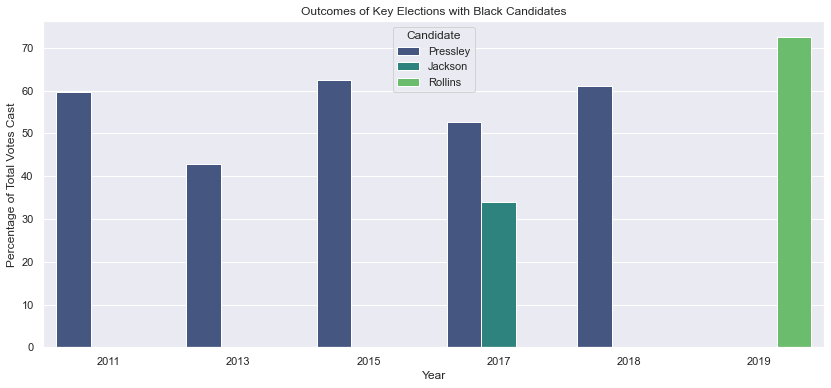

In [24]:
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.barplot(x="Year", y="Percentage", data=df, hue = "Candidate", palette = "viridis")
plt.xlabel("Year")
plt.ylabel("Percentage of Total Votes Cast")
plt.title("Outcomes of Key Elections with Black Candidates")

Text(0.5, 1.0, 'Outcomes of Key Elections with Black Candidates')

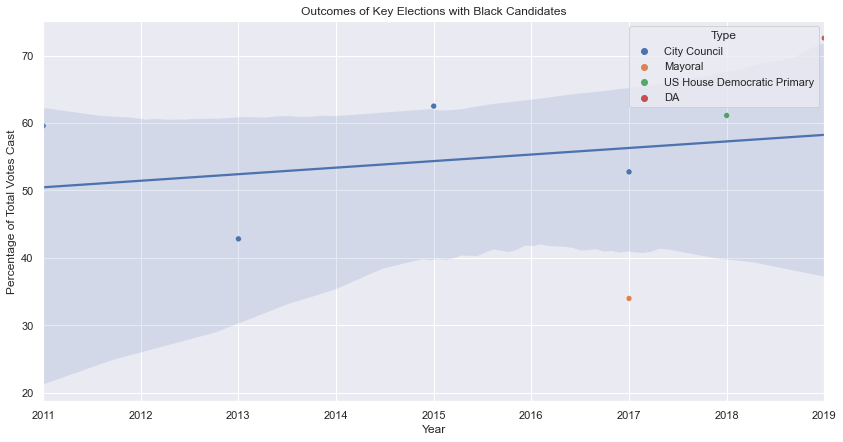

In [38]:
fig, ax = plt.subplots(figsize=(14, 7))
ax = sns.scatterplot(data=df, x="Year", y="Percentage", hue = "Type")
ax = sns.regplot(data=df, x="Year", y="Percentage", scatter=False)
plt.xlabel("Year")
plt.ylabel("Percentage of Total Votes Cast")
plt.title("Outcomes of Key Elections with Black Candidates")

In [41]:
# finding line of best fit
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

best_fit(df["Year"].to_list(), df["Percentage"].to_list())

best fit line:
y = -1905.03 + 0.97x


(-1905.0310983976722, 0.9723988439960103)